## **Introduction**

This analysis utilizes data on over 4.5 million Uber pickups in New York City from April to September 2014. The data is organized into six files, separated by month, and includes the following columns:

*   Date/Time: The date and time of the Uber pickup
*   Lat: The latitude of the Uber pickup

*  Lon: The longitude of the Uber pickup
*  Base: The TLC base company code affiliated with the Uber pickup

As we do not have access to revenue or fee per trip information, our analysis will focus on analyzing user patterns in date and time to gain insights.

In [1]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import csv files:
data_apr= pd.read_csv('uber-raw-data-apr14.csv')
data_may= pd.read_csv('uber-raw-data-may14.csv')
data_jun= pd.read_csv('uber-raw-data-jun14.csv')
data_jul= pd.read_csv('uber-raw-data-jul14.csv')
data_aug= pd.read_csv('uber-raw-data-aug14.csv')
data_sep= pd.read_csv('uber-raw-data-sep14.csv')
data_concat= pd.concat([data_apr,data_may,data_jun, data_jul,data_aug,data_sep])

## **Examining data for April 2014**

Let's start by examining the data for April 2014 in order to visualize the pattern of Uber rides in NYC.

Before creating plots, we need to create some new columns in the original dataset 'data_apr'

In [4]:
# Convert Date/Time column to datetime type:
data_apr['Date/Time'] = pd.to_datetime(data_apr['Date/Time'])

# Add two new columns of Date and Hours:
data_apr['Date'] = data_apr['Date/Time'].dt.date
data_apr['Hour'] = data_apr['Date/Time'].dt.hour
data_apr['Day_of_Week']= data_apr['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurrences of Dates and Hours:
date_counts = data_apr['Date'].value_counts().sort_index()
hour_counts = data_apr['Hour'].value_counts().sort_index()
day_counts = data_apr['Day_of_Week'].value_counts()

In [5]:
data_apr['Base'].value_counts()

Base
B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: count, dtype: int64

In [6]:
# Add a new column called 'Daytime':

def hour_to_daytime(Hour):
    if Hour>= 5 and Hour< 11:
        return 'Morning'
    elif Hour>= 11 and Hour< 17:
        return 'Afternoon'
    elif Hour>= 17 and Hour< 23:
        return 'Evening'
    else:
        return 'Midnight'

data_apr['Daytime']= data_apr['Hour'].apply(hour_to_daytime)
data_apr

,Date/Time,Lat,Lon,Base,Date,Hour,Day_of_Week,Daytime
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,0,aTuesday,Midnight
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,0,aTuesday,Midnight
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,0,aTuesday,Midnight
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,0,aTuesday,Midnight
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,0,aTuesday,Midnight
...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30,23,aWednesday,Midnight
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30,23,aWednesday,Midnight
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30,23,aWednesday,Midnight
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30,23,aWednesday,Midnight


In [7]:
data_apr['Daytime'].value_counts()

Daytime
Evening      231254
Afternoon    165319
Morning      111545
Midnight      56398
Name: count, dtype: int64

## **Plot ride volume by Date**

We will start by creating a bar plot to visualize the volume of rides throughout the dates of the month.

From the plot, it is evident that the daily ride volumes follow a cyclical pattern.

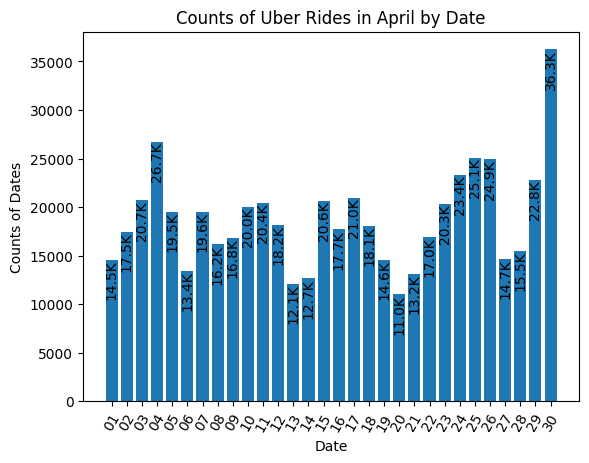

In [8]:
# Create a bar plot of Dates:
plt.bar(date_counts.index,date_counts.values)
plt.xlabel('Date')
plt.xticks(date_counts.index, [i.strftime('%d') for i in date_counts.index], rotation= 60)

plt.ylabel('Counts of Dates')

# Add annotation on y-axis:
for i in range(len(date_counts)):
    plt.text(date_counts.index[i], date_counts.values[i], f"{date_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides in April by Date')
plt.show()

## **Plot ride volume by Days in Week**

Based on the previous plot, it seems like there might also be a pattern throughout the weeks.

To confirm this, we can create another plot based on the days of the week.

Please note that we will need to reindex the x-ticks to display the days of the week from Monday to Sunday.

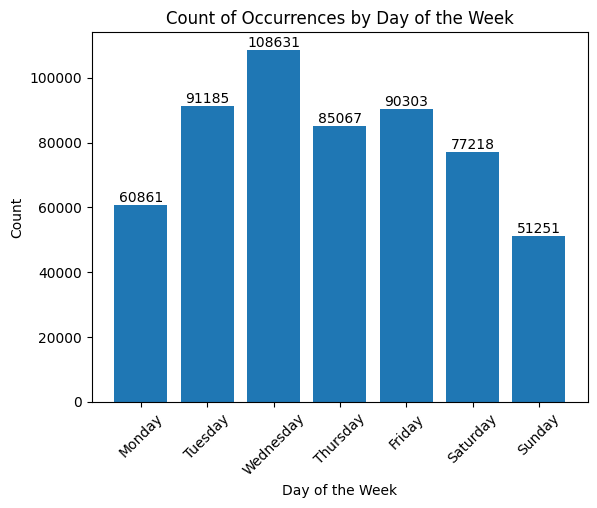

In [9]:
# Sort the counts of Days from Monday to Friday:
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_in_order= ['aMonday', 'aTuesday', 'aWednesday', 'aThursday', 'aFriday', 'aSaturday', 'aSunday']
day_counts= day_counts.reindex(days_in_order)

# Make a bar plot:
plt.bar(day_counts.index, day_counts.values)

# Reset the x-axis label:
plt.xlabel('Day of the Week')
plt.xticks(ticks= day_counts.index,labels= days_label,rotation= 45)

plt.ylabel('Count')

# Add annotation on y-axis:
for i in range(len(day_counts)):
    plt.text(day_counts.index[i], day_counts.values[i], str(day_counts.values[i]), ha='center', va='bottom')

plt.title('Count of Occurrences by Day of the Week')
plt.show()

## **Plot ride volume by Hours:**

To dive deeper into our data, we can also plot the ride occurrences by hours of a day

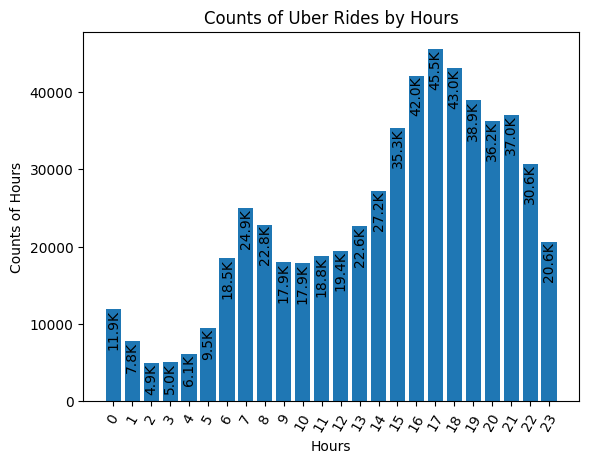

In [10]:
# Create a bar plot for Hours:
plt.bar(hour_counts.index,hour_counts.values)
plt.xlabel('Hours')
plt.xticks(hour_counts.index,rotation= 60)

plt.ylabel('Counts of Hours')

# Add annotation on y-axis:
for i in range(len(hour_counts)):
    plt.text(hour_counts.index[i], hour_counts.values[i], f"{hour_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides by Hours')
plt.show()

## **Observation 1 -- from April 2014 Data**

Based on the plot of count of Uber rides by day of the week in April 2014 in NYC,

it appears that Monday and Sunday have the least counts, while Tuesday and Wednesday have the most rides.

Additionally, the plot indicates that approximately 60% of rides occurred between 14:00 - 21:00.

Some possible proposals for the reasons behind this pattern could be:

1. Commuting patterns: Tuesdays and Wednesdays are typically busy weekdays when people commute to work and go about their regular activities. This could explain the higher ride counts on these days. In contrast, Mondays and Sundays may see fewer rides as people may be off work or have more flexible schedules.

2. Business travel: Tuesdays and Wednesdays are often popular days for business travel, as professionals may travel to different locations for meetings, conferences, or other work-related events. This could contribute to the higher ride counts on these days compared to Mondays and Sundays.

3. Weekend leisure activities: Mondays and Sundays may see fewer rides as people may prefer to stay at home or engage in leisure activities closer to their residences during weekends, resulting in lower ride counts.



## **Examing All Data from April to September¶**

Now, let's expand our time span to analyze all the data from April to September 2014 and determine if the same patterns are observed as before.

Due to the time span, we will create line plots to show pattern!

In [11]:
data_concat['Date/Time'] = pd.to_datetime(data_concat['Date/Time'])

# Add two new columns of Date and Hours:
data_concat['Date'] = data_concat['Date/Time'].dt.date
data_concat['Hour'] = data_concat['Date/Time'].dt.hour
data_concat['Day_of_Week']= data_concat['Date/Time'].dt.strftime('a%A')
data_concat['Day_of_Week']= data_concat['Day_of_Week'].str[1:]

# Calculate counts of occurrences of Dates and Hours:
date_counts_concat = data_concat['Date'].value_counts().sort_index()
hour_counts_concat = data_concat['Hour'].value_counts().sort_index()

day_counts_concat = data_concat['Day_of_Week'].value_counts()

In [12]:
base_map= {
    'B02512': 'Unter',
    'B02598': 'Hinter',
    'B02617': 'Weiter',
    'B02682': 'Schmecken',
    'B02764': 'Danach-NY'}

data_concat['Base']= data_concat['Base'].map(base_map)

In [13]:
data_concat

,Date/Time,Lat,Lon,Base,Date,Hour,Day_of_Week
0,2014-04-01 00:11:00,40.7690,-73.9549,Unter,2014-04-01,0,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,Unter,2014-04-01,0,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,Unter,2014-04-01,0,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,Unter,2014-04-01,0,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,Unter,2014-04-01,0,Tuesday
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,Danach-NY,2014-09-30,22,Tuesday
1028132,2014-09-30 22:57:00,40.6911,-74.1773,Danach-NY,2014-09-30,22,Tuesday
1028133,2014-09-30 22:58:00,40.8519,-73.9319,Danach-NY,2014-09-30,22,Tuesday
1028134,2014-09-30 22:58:00,40.7081,-74.0066,Danach-NY,2014-09-30,22,Tuesday


In [14]:
data_concat.to_csv('uber_data', index= False)

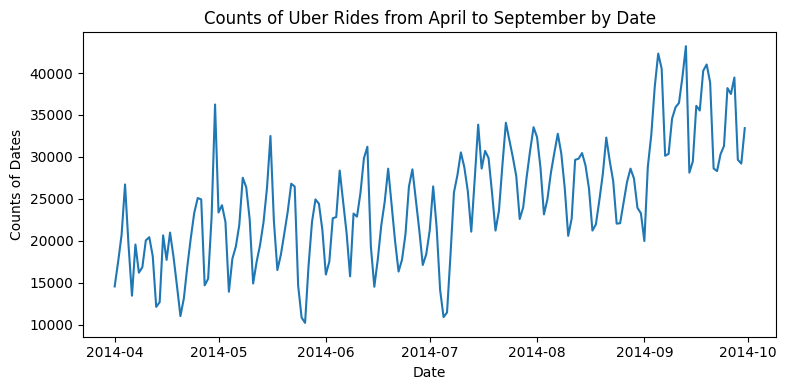

In [15]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

plt.tight_layout()
plt.show()

## **Peaks and Pits**

By creating a line plot, it appears that Uber ride volumes follow cyclical patterns, with peaks and pits.

Let's add annotations to highlight dates of these peaks and pits

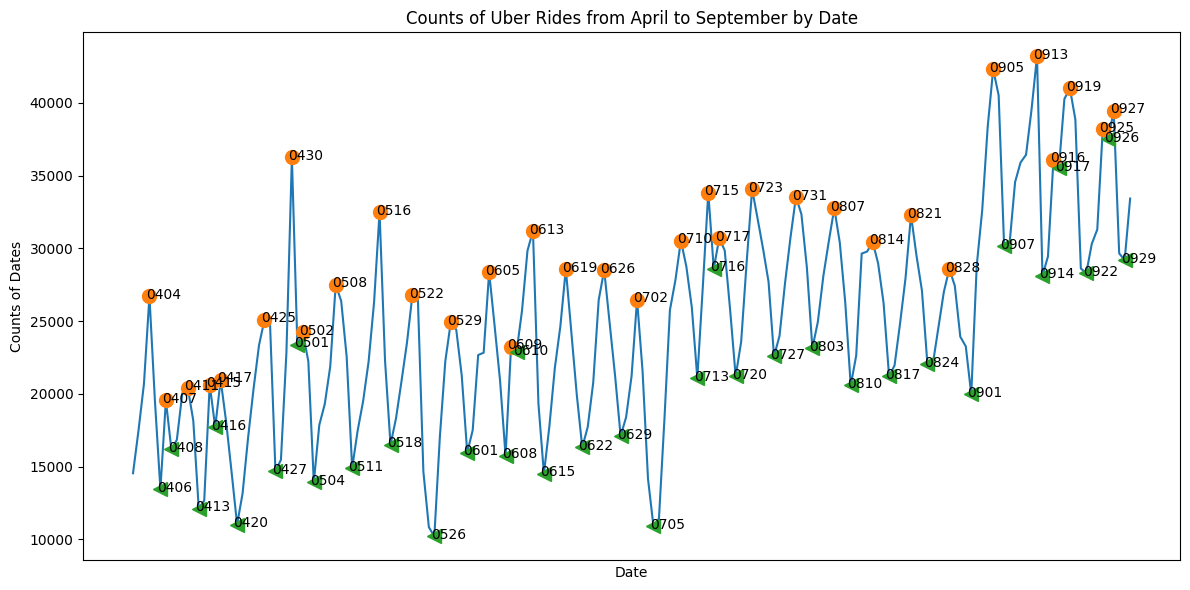

In [16]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

# Get the indices of peaks and pits in the data:
from scipy.signal import find_peaks
peaks, _ = find_peaks(date_counts_concat.values)
pits, _ = find_peaks(-date_counts_concat.values)
peaks_and_pits = np.sort(np.concatenate([peaks, pits]))

# Add markers at the peaks and pits:
ax.plot(date_counts_concat.index[peaks], date_counts_concat.values[peaks], 'o', markersize=10, label='Peaks')
ax.plot(date_counts_concat.index[pits], date_counts_concat.values[pits], '<', markersize=10, label='Pits')

# Add annotations with the corresponding dates at the peaks and pits:
for i in range(len(peaks_and_pits)):
    ax.annotate(date_counts_concat.index[peaks_and_pits[i]].strftime('%m%d'),
                xy=(date_counts_concat.index[peaks_and_pits[i]], date_counts_concat.values[peaks_and_pits[i]]),
                xytext=(10,6),
                textcoords='offset points',
                fontsize= 10,
                ha='center',
                va='top')
                #bbox= dict(boxstyle='round',facecolor='white'))

ax.set_xticks([])
plt.tight_layout()

plt.show()

**Given the line plot above, which shows peaks and dips, we can summarize the days of the week associated with these patterns.**

Following bar charts show peak and pits days distributions:

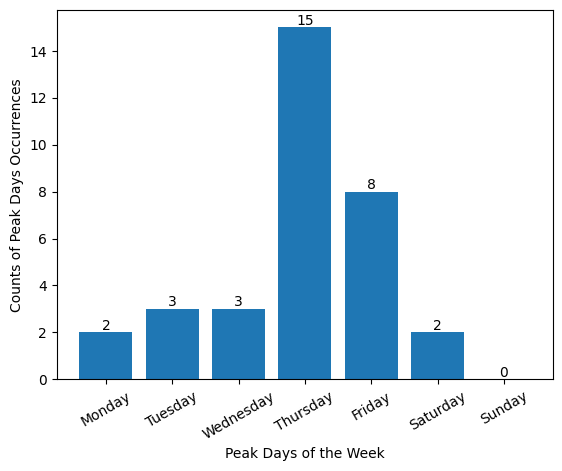

In [17]:
peak_days_of_week= []

for i in peaks:
    peak_date= date_counts_concat.index[i]
    peak_day_of_week= peak_date.strftime('%A')
    peak_days_of_week.append(peak_day_of_week)

peak_days, counts= np.unique(peak_days_of_week, return_counts= True)

peak_df= pd.DataFrame(data=counts, index=peak_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

peak_df= peak_df.reindex(days_label)
peak_df.fillna(0, inplace=True)
peak_df['Counts']= peak_df['Counts'].astype(int)

plt.bar(peak_df.index, peak_df['Counts'])
plt.xlabel('Peak Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Peak Days Occurrences')

for i in range(len(peak_df.index)):
    plt.text(peak_df.index[i],peak_df.Counts[i],peak_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

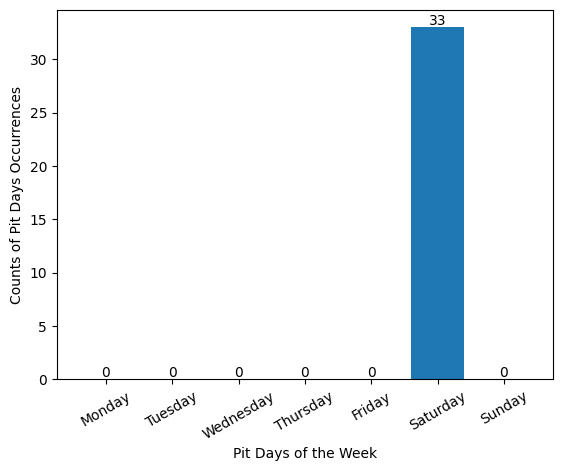

In [18]:
pits_days_of_week= []

for i in pits:
    pits_date= date_counts_concat.index[i]
    pits_day_of_week= peak_date.strftime('%A')
    pits_days_of_week.append(pits_day_of_week)

pits_days, counts= np.unique(pits_days_of_week, return_counts= True)

pits_df= pd.DataFrame(data=counts, index=pits_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pits_df= pits_df.reindex(days_label)
pits_df.fillna(0, inplace=True)
pits_df['Counts']= pits_df['Counts'].astype(int)

plt.bar(pits_df.index, pits_df['Counts'])
plt.xlabel('Pit Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Pit Days Occurrences')

for i in range(len(pits_df.index)):
    plt.text(pits_df.index[i],pits_df.Counts[i],pits_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

## **Observation 2 -- from Peak and Pit Pattern:**

Based on the visualizations of Uber ride data in New York City from April to September 2014, it was found that:

**Thursdays and Fridays were the most frequent peak ride days**, with the highest number of rides occurring on these days. This suggests that there may be increased demand for Uber rides on Thursdays and Fridays, possibly due to higher travel activity, events, or other factors during these weekdays.

**All 33 pit days, or days with the lowest ride counts, were observed on Sundays**, indicating relatively lower demand for Uber rides on Sundays during this period.

These observations from the half-year data align with our findings from April 2014, indicating that the observed patterns are not seasonal but rather continuous.

This also supports our proposal that higher commute needs during weekdays result in increased ride volume, while reduced activities on weekends lead to decreased ride demands.



## **Heatmap Analysis of Uber Ride Patterns in NYC: Validating Proposals:**
To further validate our proposal regarding weekday commute needs and reduced ride demands on weekends --

We will create heatmaps using the 'Lat' and 'Lon' columns from the original data to visualize ride patterns on Thursday (peak day) and Sunday (off-peak day).

We will name these heatmaps Thursday_heatmap and Sunday_heatmap, respectively, and by comparing them, we can gain valuable insights.

In [19]:
# Parse data:
thursday_data= data_apr[data_apr['Day_of_Week']=='aThursday']

import folium
from folium.plugins import HeatMap
heatmap_thursday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(thursday_data[['Lat','Lon']].values).add_to(heatmap_thursday)

heatmap_thursday

**Sunday Rides Heatmap:**

In [20]:
# Parse data:
sunday_data= data_apr[data_apr['Day_of_Week']=='aSunday']

import folium
from folium.plugins import HeatMap
heatmap_sunday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(sunday_data[['Lat','Lon']].values).add_to(heatmap_sunday)

heatmap_sunday

## **Observation 3 -- from Heatmap:**

Our observation of Uber ride patterns in NYC reveals that Thursdays consistently show the highest ride volume throughout the year --

The Thursday heatmap indicating a wider range of rides extending to suburban areas such as Bridgeport, Clverton, and Bridgewater Township.

In contrast, on Sundays, the rides are concentrated in areas like New Brunswick and downtown.

These two heatmaps provide compelling evidence to support our proposal that weekday commute needs are the primary drivers of ride demand, while reduced activity on weekends represents a key pain point.